In [3]:
#Importando bibliotecas

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

<h5>Importando o dataframe

In [14]:
dados = pd.read_csv('E:/Mestrado Matérias/2 MÓDULO/Machine Learning/LISTA 3/Q2.csv')

#Excluímos a coluna Dia pois não nos dá informação útil.
dados = dados.drop('Dia',axis=1)

dados

,Tempo,Temperatura,Umidade,Vento,Joga
0,Ensolarado,Quente,Alta,Fraco,Nao
1,Ensolarado,Quente,Alta,Forte,Nao
2,Nublado,Quente,Alta,Fraco,Sim
3,Chuvoso,Media,Alta,Fraco,Sim
4,Chuvoso,Fria,Normal,Fraco,Sim
5,Chuvoso,Fria,Normal,Forte,Nao
6,Nublado,Fria,Normal,Forte,Sim
7,Ensolarado,Media,Alta,Fraco,Nao
8,Ensolarado,Fria,Normal,Fraco,Sim
9,Chuvoso,Media,Normal,Fraco,Sim


<h5>Separando os atributos da classe

In [15]:
X = dados.iloc[:,0:4].values

X

array([['Ensolarado', 'Quente', 'Alta', 'Fraco'],
       ['Ensolarado', 'Quente', 'Alta', 'Forte'],
       ['Nublado', 'Quente', 'Alta', 'Fraco'],
       ['Chuvoso', 'Media', 'Alta', 'Fraco'],
       ['Chuvoso', 'Fria', 'Normal', 'Fraco'],
       ['Chuvoso', 'Fria', 'Normal', 'Forte'],
       ['Nublado', 'Fria', 'Normal', 'Forte'],
       ['Ensolarado', 'Media', 'Alta', 'Fraco'],
       ['Ensolarado', 'Fria', 'Normal', 'Fraco'],
       ['Chuvoso', 'Media', 'Normal', 'Fraco'],
       ['Ensolarado', 'Media', 'Normal', 'Forte'],
       ['Nublado', 'Media', 'Alta', 'Forte'],
       ['Nublado', 'Quente', 'Normal', 'Fraco'],
       ['Chuvoso', 'Media', 'Alta', 'Forte']], dtype=object)

<h5> Separando os valores da classe

In [16]:
y = dados.iloc[:,-1].values

y

array(['Nao', 'Nao', 'Sim', 'Sim', 'Sim', 'Nao', 'Sim', 'Nao', 'Sim',
       'Sim', 'Sim', 'Sim', 'Sim', 'Nao'], dtype=object)

<h5>Transformando os dados categóricos em numéricos
    

In [17]:
label_encoder_tempo = LabelEncoder()
label_encoder_temperatura = LabelEncoder()
label_encoder_umidade = LabelEncoder()
label_encoder_vento = LabelEncoder()

In [18]:
X[:,0] = label_encoder_tempo.fit_transform(X[:,0])
X[:,1] = label_encoder_temperatura.fit_transform(X[:,1])
X[:,2] = label_encoder_umidade.fit_transform(X[:,2])
X[:,3] = label_encoder_vento.fit_transform(X[:,3])

X

array([[1, 2, 0, 1],
       [1, 2, 0, 0],
       [2, 2, 0, 1],
       [0, 1, 0, 1],
       [0, 0, 1, 1],
       [0, 0, 1, 0],
       [2, 0, 1, 0],
       [1, 1, 0, 1],
       [1, 0, 1, 1],
       [0, 1, 1, 1],
       [1, 1, 1, 0],
       [2, 1, 0, 0],
       [2, 2, 1, 1],
       [0, 1, 0, 0]], dtype=object)

<h5> Legenda

In [19]:
#Ensolarado = 1, Nublado = 2 , Chuvoso = 0
#Quente = 2, Média = 1, Fria = 0
#Alta = 0, Normal = 1
#Fraco = 1, Forte = 0

<h5>Dividindo e treinando

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

In [21]:
arvore = DecisionTreeClassifier(criterion='entropy')

arvore.fit(X,y)

DecisionTreeClassifier(criterion='entropy')

In [22]:
arvore.feature_importances_

array([0.51455805, 0.        , 0.21123658, 0.27420537])

In [23]:
for feature,importancia in zip(dados.columns,arvore.feature_importances_):
    print('{}:{}'.format(feature,importancia))

Tempo:0.5145580473505383
Temperatura:0.0
Umidade:0.21123657918595443
Vento:0.2742053734635072


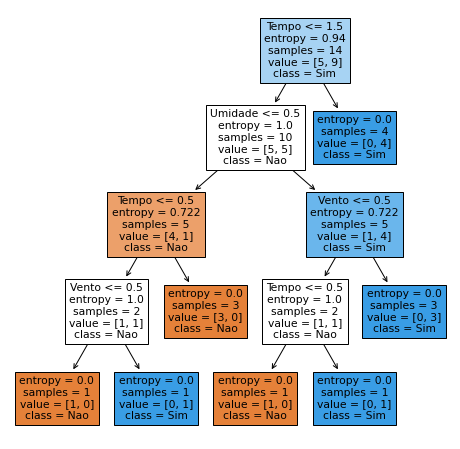

In [24]:
from sklearn import tree
previsores = ['Tempo','Temperatura','Umidade','Vento']
figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=(8,8))
tree.plot_tree(arvore,feature_names=previsores, class_names = arvore.classes_, filled=True);

<H5>Renderizando a árvore de decisão
    

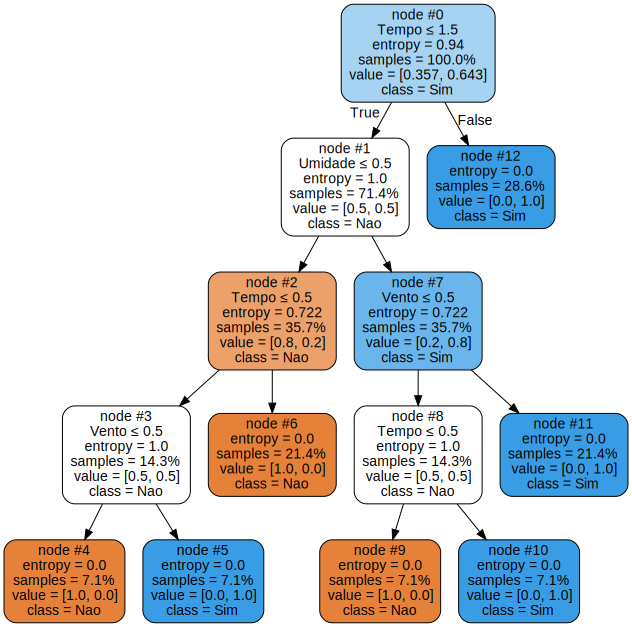

In [25]:
import pydot
import graphviz
from sklearn.tree import DecisionTreeClassifier,export_graphviz

dot_data = export_graphviz(
        arvore,
        out_file=None,
        feature_names=dados.drop('Joga',axis =1).columns,
        class_names=arvore.classes_,
        filled=True, rounded=True,
        proportion=True,
        node_ids=True,
        rotate=False,
        label='all',
        special_characters=True
        )
graph = graphviz.Source(dot_data)

graph

In [26]:
#Com base na árvore obtida, qual será a decisão para um novo dia com as seguintes características: 
#chuvoso(0), quente(2), alta(0) e forte(0)?

#Ensolarado = 1, Nublado = 2 , Chuvoso = 0
#Quente = 2, Média = 1, Fria = 0
#Alta = 0, Normal = 1
#Fraco = 1, Forte = 0

previsao = arvore.predict([[0,2,0,0]])

previsao


array(['Nao'], dtype=object)

<h5> Extraindo as regras de decisão 

In [27]:
from sklearn.tree import _tree
def get_rules(tree, feature_names, class_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    paths = []
    path = []
    
    def recurse(node, path, paths):
        
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            p1, p2 = list(path), list(path)
            p1 += [f"({name} <= {np.round(threshold, 3)})"]
            recurse(tree_.children_left[node], p1, paths)
            p2 += [f"({name} > {np.round(threshold, 3)})"]
            recurse(tree_.children_right[node], p2, paths)
        else:
            path += [(tree_.value[node], tree_.n_node_samples[node])]
            paths += [path]
            
    recurse(0, path, paths)

    # sort by samples count
    samples_count = [p[-1][1] for p in paths]
    ii = list(np.argsort(samples_count))
    paths = [paths[i] for i in reversed(ii)]
    
    rules = []
    for path in paths:
        rule = "if "
        
        for p in path[:-1]:
            if rule != "if ":
                rule += " and "
            rule += str(p)
        rule += " then "
        if class_names is None:
            rule += "response: "+str(np.round(path[-1][0][0][0],3))
        else:
            classes = path[-1][0][0]
            l = np.argmax(classes)
            rule += f"class: {class_names[l]} (proba: {np.round(100.0*classes[l]/np.sum(classes),2)}%)"
        rule += f" | based on {path[-1][1]:,} samples"
        rules += [rule]
        
    return rules

In [28]:
#rules = get_rules(modelo treinado, atributos banco de dados menos a clase, classe)
rules = get_rules(arvore, dados.drop('Joga',axis =1).columns, dados['Joga'])
for r in rules:
    print(r)

if (Tempo > 1.5) then class: Nao (proba: 100.0%) | based on 4 samples
if (Tempo <= 1.5) and (Umidade > 0.5) and (Vento > 0.5) then class: Nao (proba: 100.0%) | based on 3 samples
if (Tempo <= 1.5) and (Umidade <= 0.5) and (Tempo > 0.5) then class: Nao (proba: 100.0%) | based on 3 samples
if (Tempo <= 1.5) and (Umidade > 0.5) and (Vento <= 0.5) and (Tempo > 0.5) then class: Nao (proba: 100.0%) | based on 1 samples
if (Tempo <= 1.5) and (Umidade > 0.5) and (Vento <= 0.5) and (Tempo <= 0.5) then class: Nao (proba: 100.0%) | based on 1 samples
if (Tempo <= 1.5) and (Umidade <= 0.5) and (Tempo <= 0.5) and (Vento > 0.5) then class: Nao (proba: 100.0%) | based on 1 samples
if (Tempo <= 1.5) and (Umidade <= 0.5) and (Tempo <= 0.5) and (Vento <= 0.5) then class: Nao (proba: 100.0%) | based on 1 samples
